<h2>
Backtesting a Pairs Trading Strategy
</h2>
<p>
This notebook is a sequel to the notebook <i>Exploratory Statistics of Pairs Trading</i>
(https://github.com/IanLKaplan/pairs_trading/blob/master/pairs_trading.ipynb). The previous notebook explores the algorithms for selecting
pairs and the statistics of pairs trading. This statistical exploration provides the foundation for the strategy that his backtested in
this notebook. For a discussion of pairs trading, the algorithms used to select pairs and the background for the strategy that is
backetested in this notebook, please see the pevious notebook.
</p>
<h2>
Pairs Trading Strategy
</h2>
<h3>
Shorting Stocks in Pairs Trading
</h3>
<p>
This section discusses the mechanics of taking a short position in a stock. A short position in a stock is a margin loan and is more
complicated than a long position.
</p>
<p>
Pairs trading is a market neutral long/short strategy where the long and short positions for a pair have approximately equal
dollar values when the position is opened. A profit is realized when there is mean reversion in the prices of a pair.
</p>
<p>
When a stock is "shorted", the stock is borrowed and then immediately sold, realizing cash.  For example, if 100 shares at a current market
price of 10 are shorted, the brokerage account will be credited with 1000 (100 x 10).  At some point in the future, the borrowed stock must be paid
back by buying the stock at the current market price.  A short position is profitable when the market price of the stock goes down.
For example, if the market price of the stock shorted at 10 goes down to 6, there is a profit of 4 per share (4 x 100 = 400).
</p>
<p>
Short positions can have unlimited loss when the stock price goes up.  For example, if the market price of the 10 stock rises to
14 per share, there is a 400 loss on the 100 share purchase. If the stock price doubles to 20 there will be a loss of 10 per share
or 1000 for the short position.
</p>
<p>
Shorting stocks is often considered a risky investment strategy because of the potential of unlimited loss. Pairs
trading is a market neutral strategy where there is a long position that is approximately equal in dollar value to the short position.
The pairs that are traded are chosen from the same industry sector and are highly correlated and cointegrated. If the market price of
the shorted stock rises, the value of the long member of the pair should rise as well. The profit in the long position will tend
to offset the loss in the short position. This makes the pairs trading strategy less risky than a short only strategy.
</p>
<p>
When a stock is shorted, the stock is borrowed from the broker. This is treated as a margin loan. The brokerage requires that the customer maintain a
balance with liquid assets of 150 percent of the amount borrowed. This includes the proceeds of the short sale, plus 50 percent.
For example, if 100 shares of a 10 dollar stock are shorted, the account will be credited with 1000. The account must also
have an addition balance of 500. The margin requirement can be met with cash or highly tradable "blue chip" stocks (e.g., S&P 500 stocks).
</p>
<p>
The pairs trading strategy is cash efficient. For example, a long position of 1000 and a short position of 1000 can be opened with
only 500 in cash or highly tradable assets.
</p>
<p>
When the pairs spread crosses a threshold, a long-short position is opened in the pair. This threshold is the mean plus or minus
some delta amount. The dollar value of the long and short positions will be approximately equal (they will usually not be exactly
equal because we are trading whole share amounts).  When the spread value crosses the threshold:
</p>
<ol>
<li>
<p>
Open the short position. This will result in cash from the short sale.
</p>
</li>
<li>
<p>
The proceeds from the short sale are used to pay for the long position.  An additional amount of cash may be needed for the long
postion.
</p>
</li>
</ol>
<p>
This is summarized in the equations below. The "/" operator is an integer divide operator:
</p>

$$ \text{short shares} = \text{position} / \text{short share price} $$

$$ \text{short cash} = \text{short shares} \times \text{short share price} $$

$$  \text{long shares} = \text{position} / \text{long share price}) $$

$$  \text{long cost} = \text{long shares} \times \text{long share price} $$

<p>
If the cost of the long position is greater than the cash realized from the short position, additional cash will be
allocated for the long position.
</p>
<h4>
Example:
</h4>
<p>
If out trading capital is 100,000 we can open a 200,000 long and 200,000 short position, given a 50 percent margin.
A less agressive approach would be a 160,000 long position and a 160,000 short position. The required
margin of 80,000 plus an additonal 20,000 cushion. Ideally the margin funds could be allocated to an asset like the
SHY ETF which pays a monthly dividend.
</p>
<p>
If we trade 100 pairs, then each pair is allocated 1,600 for the long and short positions.
</p>
<p>
Stock A (the long position) is 63 per share and stock B (the short position) is 54 a share.  We open the short position first
to obtain the cash for the long position. The division operations are integer division.
</p>

$$ \text{short position} = floor(1600 / 54) = \text{29 shares} \times 54 =  1566 $$

$$ \text{long position} = round(1600 / 63 ) = \text{25 shares} \times 63 = 1575 = \text{1566 short} + \text{9 cash} $$

<p>
Interactive Brokers charges a yearly fee for short positions is 0.25 percent or 0.25/360 percent per day that the position is held. For a yearly
short position of 160,000 the total short interest cost would be 400.  This is small enough that the short interest cost can be ignored.
</p>
<p>
The pairs trading strategy will have a portfolio of short and long positions which are opened and closed as the pair spread moves.
At any time, the aggregate value of the short positions and the long positions, plus margin cash, must be within the margin
requirements. If there is a liquidity deficit relative to the margin, IB will liquidate the deficit amount times 4 (ouch!)
</p>
<p>
When the short position is opened there must be a margin of at least 50 percent. Interactive brokers marks to market in real time.
The SEC regulation T requires that there be a margin of at least 25%.
</p>
<h4>
Interactive Brokers Margin reference
</h4>
<ul>
<li>
<a href="https://www.interactivebrokers.com/en/general/education/pdfnotes/WN-UnderstandingMargin.php">Understanding Margin Webinar Notes</a>
</li>
</ul>
<h3>
Stock Price Data Issues
</h3>
<p>
The backtest in this notebook uses the daily close price for the stocks. If a large number of stocks are traded (i.e., 100 stocks)
the trading application would use the intraday price (perhaps with a 15 minute delay). The intraday prices will generally not be the same as
the close price. The purpose of the backtest is not provide an indication of the profitability and risk of the pairs trading strategy, so
this difference is acceptable.
</p>
<h3>
In-sample and out-of-sample time periods
</h3>
<p>
The pairs trading set is constructed by looking back over the past in-sample period. The out-of-sample period is the trading period.
</p>
<ul>
<li>
<p>
In-sample period: six months (126 trading days)
</p>
</li>
<li>
<p>
Out-of-sample (trading) period: three months (63 trading days). A 63 day period should be long enough to capture mean reversion.
By using a relatively short out-of-sample period risk of holding pairs is reduced and the statistics for pairs selection can
be calculated after the out-of-sample period.
</p>
</li>
</ul>
<h4>
Strategy
</h4>
<p>
Get pairs for each S&P 500 industrial sectors
</p>
<p>
For each 126 day in-sample window (moving forward every 63 days):
</p>
<ol>
<li>
Select the pairs with close price series correlation greater than or equal to 0.75
</li>
<li>
Select the high correlation pairs that show Granger cointegration
</li>
<li>
Remove pairs that have the same stock (all stocks should be unique and be present in only one pair)
</li>
<li>
Sort the pair spread time series by volatility (high to low volatility). Higher volatility (standard deviation) pairs
are more likely to be profitable.
</li>
<li>
Select N pairs from the unique pair list
</li>
</ol>
<h4>
Out-of-sample trading period
</h4>
<p>
The pairs trading backtest is intended to be as close to actual trading as possible in order to understand whether this strategy is worth
pursuing for actual trading.
</p>
<p>
At the start date of the backtest, the total cash available is N dollars (e.g., 100,000). With a required margin of 50 percent,
this would allow us to have a position of 2N for the long and short postions (e.g., for 100,000 cash, long and short postions
of 200,000 each). A more conservative approach is 2N x 0.80 or 160,000 for the long and short postions with 100,000 cash
(e.g., 160,000 long, 160,000 short and 100,000 cash or securities like SHY).
</p>
<p>
Positions are opened for whole share values.
</p>
<p>
At the end of each in-sample trading period, any open positions will closed. The resulting cash is used in the next trading period.
</p>
<p>
For each pair (in the N pair set) in the out-of-sample trading period:
</p>
<ol>
<li>
<p>
Calculate the current spread value S from the current pair close prices (stocks A and B).
</p>

$ S_t = A{_t} - \text{intercept} - \beta B{_t} $

</li>
<li>
The
$ \Delta $
value is a multiplier for the standard deviation
$ \sigma $
If
$ spread_t >= \mu + \Delta \sigma $
then open a short position in
$ A $
and a long position in
$ \beta B $
</li>
<li>
If
$ spread_t <= \mu + \Delta \sigma$
then open a long position in
$ A $
and a short position in
$ B $
</li>
<li>
If there is an open pair position that has a spread that crosses the mean, the positions will be closed. The profit and
loss amount will be updated.
</li>
</ol>
<h4>
Trading Period Statistics
</h4>
<ol>
<li>
Running margin values, by day. The margin increases when
$ S_t > P $
where
$ S_t $
is the current stock price and
$ P $
is the entry price for the short position.
</li>
<li>
Return for each pair
</li>
<li>
Overall return for the trading period
</li>
<li>
Standard deviation for the trading period
</li>
<li>
Number of pairs that had a loss and a profit
</li>
<li>
Maximum drawdown for the trading period
</li>
</ol>
<h4>
Yearly Results
</h4>
<li>
Yearly return
</li>
<li>
Yearly standard deviation
</li>
<li>
Yearly maximum drawdown
</li>
<li>
Sharpe Ratio
</li>
<li>
VaR and CVaR
</li>
</ol>
<h4>

In [1]:

#
# To generate a python file from the notebook use jupytext:
# pip install jupytext --upgrade
# jupytext --to py pairs_trading_backtest.ipynb
#

import os
from datetime import datetime
from enum import Enum
from typing import List, Tuple, Dict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

from pairs.pairs import get_pairs
#
# Local libraries
#
from plot_ts.plot_time_series import plot_two_ts
from read_market_data.MarketData import MarketData, read_s_and_p_stock_info, extract_sectors

from s_and_p_filter import s_and_p_directory, s_and_p_stock_file
from utils import find_date_index

# Apply the default theme
sns.set_theme()

s_and_p_file = s_and_p_directory + os.path.sep + s_and_p_stock_file

start_date_str = '2007-01-03'
start_date: datetime = datetime.fromisoformat(start_date_str)

trading_days = 252
half_year = int(trading_days / 2)
quarter = int(trading_days / 4)

stock_info_df = read_s_and_p_stock_info(s_and_p_file)
stock_l: list = list(set(stock_info_df['Symbol']))
stock_l.sort()
market_data = MarketData(start_date=start_date)

# Get close prices for the S&P 500 list
close_prices_df = market_data.get_close_data(stock_l)
final_stock_list = list(close_prices_df.columns)

mask = stock_info_df['Symbol'].isin(final_stock_list)
# Some stocks were listed on the stock exchange later than start_date. In this case the stock will not
# be returned by MarketData.get_close_data(). final_stock_info has the Symbol, Name, Sector for the
# set of stocks that it was possible to obtain close prices for the date range.
final_stock_info_df = stock_info_df[mask]

sectors = extract_sectors(final_stock_info_df)

pairs_list = get_pairs(sectors)


class CointData:

    def __init__(self, stock_a: str, stock_b: str, weight: float, intercept: float):
        self.stock_a: str = stock_a
        self.stock_b: str = stock_b
        self.weight: float = weight
        self.intercept: float = intercept
        self.mean: float = 0.0  # mean of the spread
        self.stddev: float = 0.0  # standard deviation of the spread


class PairStatistics:

    def __init__(self, period_close_prices_df: pd.DataFrame) -> None:
        """
        :param period_close_prices_df: close prices for an in-sample period
        """
        self.close_prices: pd.DataFrame = period_close_prices_df
        self.stock_list = self.close_prices.columns
        self.decimals = 2

    def pair_correlation(self, pair: Tuple) -> float:
        """
        :param pair: the pair is a Tuple like  ('ALB', 'APD', 'materials') So pair[0] is 'ALB' and pair[1] is 'APD'
        :return: the correlation for the pair in the close price period
        """
        stock_A: str = pair[0]
        stock_B: str = pair[1]
        correlation: float = -2.0  # bad correlation value
        if stock_A in self.stock_list and stock_B in self.stock_list:
            data_a = self.close_prices[stock_A]
            data_b = self.close_prices[stock_B]
            c = np.corrcoef(data_a, data_b)
            correlation = round(c[0, 1], 2)
        return correlation

    def check_coint(self, coint_stat: float, critical_vals: dict) -> bool:
        """
        :param coint_stat: the ADF statistic
        :param critical_vals: a dictionary defining the ADF intervals {'1%': -3.49, '5%': -2.89, '10%': -2.58}. The
                              dictionary values may be either positive or negative.
        :return: if the adf_stat is in the critical value range, return True, False otherwise
        """
        cointegrated = False
        abs_coint_stat = abs(coint_stat)
        for key, value in critical_vals.items():
            abs_value = abs(value)
            if abs_coint_stat > abs_value:
                cointegrated = True
                break
        return cointegrated

    def engle_granger_coint(self, pair: Tuple) -> CointData:
        coint_data = None
        stock_A: str = pair[0]
        stock_B: str = pair[1]
        if stock_A in self.stock_list and stock_B in self.stock_list:
            close_a = self.close_prices[stock_A]
            close_b = self.close_prices[stock_B]
            close_b_const = sm.add_constant(close_b)
            # x = I + b * A
            result_ab = sm.OLS(close_a, close_b_const).fit()
            close_a_const = sm.add_constant(close_a)
            # x = I + b * B
            result_ba = sm.OLS(close_b, close_a_const).fit()
            slope_ab = result_ab.params[stock_B]
            slope_ba = result_ba.params[stock_A]
            result = result_ab
            slope = slope_ab
            if slope_ab < slope_ba:
                t = stock_A
                stock_A = stock_B
                stock_B = t
                result = result_ba
                slope = slope_ba
            slope = round(slope, self.decimals)
            intercept = round(result.params['const'], self.decimals)
            # A hack that attempts to get rid of outlier pairs. The values for the slop and intercept cutoffs
            # were arrived at by looking at the distributions of the data. Still, it's a bit arbitrary.
            if slope <= 6 and abs(intercept) <= 100:
                residuals = result.resid
                adf_result = adfuller(residuals)
                adf_stat = round(adf_result[0], self.decimals)
                critical_vals = adf_result[4]
                cointegrated = self.check_coint(adf_stat, critical_vals)
                if cointegrated:
                    coint_data = CointData(stock_a=stock_A, stock_b=stock_B, weight=slope, intercept=intercept)
        return coint_data


class InSamplePairs:

    def __init__(self, in_sample_close_df: pd.DataFrame, corr_cutoff: float) -> None:
        self.corr_cutoff = corr_cutoff
        self.in_sample_close_df = in_sample_close_df
        self.pairs_stats = PairStatistics(self.in_sample_close_df)

    def select_pairs(self, pairs_list: List[Tuple]) -> List[CointData]:
        """
        Select pairs with high correlation and cointegratoin
        :param pairs_list: a list of pairs
        :return: a list of CointData for pairs that have a correlation greater than self.corr_cutoff and
        are cointegrated.
        """
        coint_list: List = list()
        for pair in pairs_list:
            pair_cor = self.pairs_stats.pair_correlation(pair)
            if pair_cor >= self.corr_cutoff:
                coint_data = self.pairs_stats.engle_granger_coint(pair)
                if coint_data is not None:
                    coint_list.append(coint_data)
        return coint_list

    def add_spread_stats(self, coint_data_list: List[CointData]) -> None:
        """
        Add the spread standard deviation to the CointData object
        :param coint_data_list:
        :return:
        """
        for coint_pair in coint_data_list:
            stock_a = coint_pair.stock_a
            stock_b = coint_pair.stock_b
            close_a = self.in_sample_close_df[stock_a]
            close_b = self.in_sample_close_df[stock_b]
            weight = coint_pair.weight
            spread = close_a - coint_pair.intercept - weight * close_b
            coint_pair.stddev = np.std(spread)

    def filter_pairs_list(self, coint_data_list: List[CointData]) -> List[CointData]:
        """
        Filter the pairs list so that the stocks in the list are unique. That is, no stock appears
        in more than one pair.

        This is done by building a dictionary with the key for stock_a from CointData and
        a list of the CointData elements that have stock_a. The maximum standard deviation
        is then used to find the maximum element.
        :param coint_data_list:
        :return:
        """
        filtered_pairs: List[CointData] = list()
        pairs_dict: Dict = dict()
        for pair_info in coint_data_list:
            stock_key = pair_info.stock_a
            if stock_key not in pairs_dict:
                pairs_dict[stock_key] = list()
            l: List = pairs_dict[stock_key]
            l.append(pair_info)
        for key in pairs_dict.keys():
            l: List = pairs_dict[key]
            max_elem = max(l, key=lambda elem: elem.stddev)
            if max_elem is not None:
                filtered_pairs.append(max_elem)
        return filtered_pairs

    def get_in_sample_pairs(self, pairs_list: List[Tuple]) -> List[CointData]:
        coint_data_list: List[CointData] = self.select_pairs(pairs_list)
        self.add_spread_stats(coint_data_list)
        filtered_list = self.filter_pairs_list(coint_data_list)
        # Sort by declining standard deviation value
        filtered_list.sort(key=lambda elem: elem.stddev, reverse=True)
        return filtered_list


close_price_index = close_prices_df.index
in_sample_start = find_date_index.findDateIndex(close_price_index, start_date)
in_sample_end = in_sample_start + half_year
in_sample_df = close_prices_df.iloc[in_sample_start:in_sample_end]
period_backtest = InSamplePairs(in_sample_close_df=in_sample_df, corr_cutoff=0.75)
coint_list = period_backtest.get_in_sample_pairs(pairs_list)




1 Failed download:

1 Failed download:
- DRE: No data found, symbol may be delisted- CTXS: No data found, symbol may be delisted


1 Failed download:
- NLOK: No data found, symbol may be delisted

1 Failed download:
- NLSN: No data found, symbol may be delisted


<h3>
Filtering Pairs
</h3>
<p>
From the universe of S&P 500 industry sector stock pairs, pairs are first selected for high correlation and then for
cointegration using the Engle-Granger test (linear regression and the ADF test).
</p>
<p>
The pairs are filtered again so that each stock is present in only one pair. If a stock appears in more than one pair, the pair
that has the highest standard deviation is chosen (in theory higher standard deviation will result in higher return). The distribution of
in-sample standard deviations is shown below.
</p>

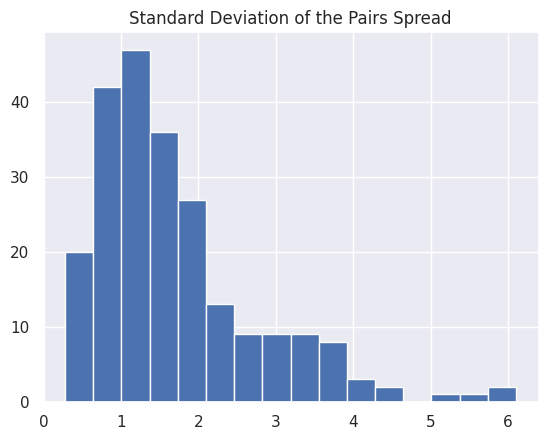

In [2]:


spead_stddev = np.array(list(elem.stddev for elem in coint_list))
plt.hist(spead_stddev, bins='auto')
plt.title('Standard Deviation of the Pairs Spread')

out_of_sample_start = in_sample_end
out_of_sample_end = out_of_sample_start + quarter
out_of_sample_df = close_prices_df.iloc[out_of_sample_start:out_of_sample_end]


def normalize_df(data_df: pd.DataFrame) -> pd.DataFrame:
    min_s = data_df.min()
    max_s = data_df.max()
    norm_df = (data_df - min_s) / (max_s - min_s)
    return norm_df


def plot_stationary_ts(stationary_df: pd.DataFrame, plus_delta: float, minus_delta: float, title: str) -> None:
    stationary_df.plot(grid=True, title=title, figsize=(10, 6))
    stat_mean = stationary_df.mean()[0]
    plt.axhline(y=stat_mean, color='black', linewidth=2)
    plt.axhline(y=stat_mean + plus_delta, color='red', linewidth=1, linestyle='--')
    plt.axhline(y=stat_mean - minus_delta, color='green', linewidth=1, linestyle='--')
    plt.show()


def plot_pair_data(close_df: pd.DataFrame, pair: CointData, title_prefix: str) -> None:
    stock_a_df: pd.DataFrame = pd.DataFrame(close_df[pair.stock_a])
    stock_b_df: pd.DataFrame = pd.DataFrame(close_df[pair.stock_b])
    stock_a_norm_df = normalize_df(stock_a_df)
    stock_b_norm_df = normalize_df(stock_b_df)
    plot_two_ts(data_a=stock_a_norm_df, data_b=stock_b_norm_df, title=f'{title_prefix} normalized {pair.stock_a},{pair.stock_b}',
                x_label='date', y_label='Normalized Price')
    spread_df = pd.DataFrame(stock_a_df.values - pair.intercept - pair.weight * stock_b_df.values)
    spread_df.index = close_df.index
    plot_stationary_ts(stationary_df=spread_df, plus_delta=pair.stddev, minus_delta=pair.stddev,
                       title=f'{title_prefix} spread for {pair.stock_a} and {pair.stock_b}')



<h3>
Unstable Statistics
</h3>
<p>
A core concept behind pairs trading is that the statistics that are calculated for the in-sample period are stable and can be applied in the
out-of-sample trading period. The previous notebook, <i>Exploratory Statistics of Pairs Trading</i>, looks at how stable some
statistics are between adjacent period. As it turns out, high correlation is consistent between adjacent period only about 50 percent of
the time. Cointegration is true between adjacent period even less, only about 40 percent of the time.
</p>
<p>
Pairs trading assumes that the spread time series is "stationary", that it has a constant mean and standard deviation. Unfortunately this
is not necessarily true, even for spread time series that are mean reverting in the in-sample and out-of-sample period.
</p>
<p>
The plots below show the normalized time series for a pair and the spread time series. The plots show the mean as a thick horizontal line.
The in-sample mean is near zero. The out-of-sample mean is far from zero (e.g., -25). In both of the plots of the spread time series,
the in-sample deviation is shown in the dotted line. As it turns out, the out-of-sample standard deviation is around twice the in-sample
standard deviation.
</p>

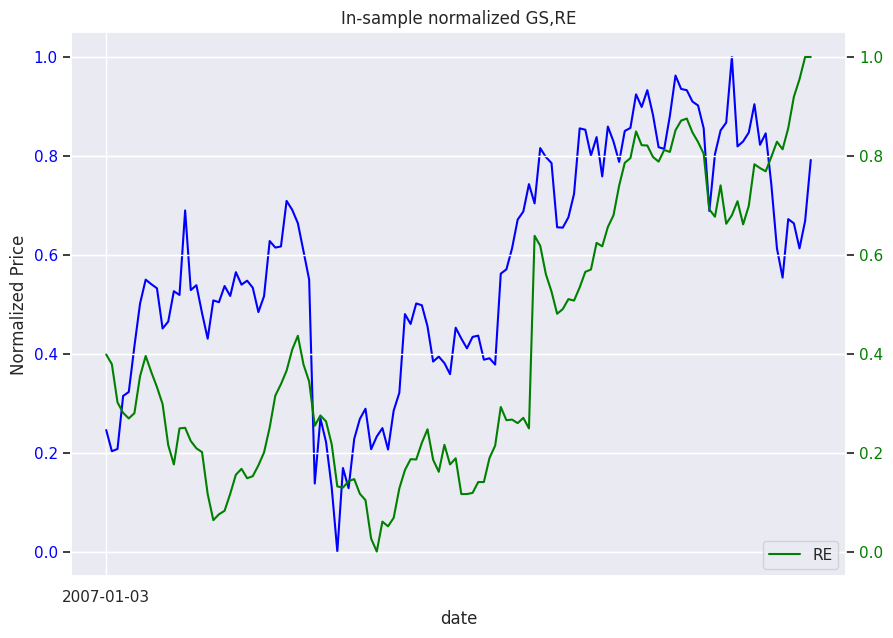

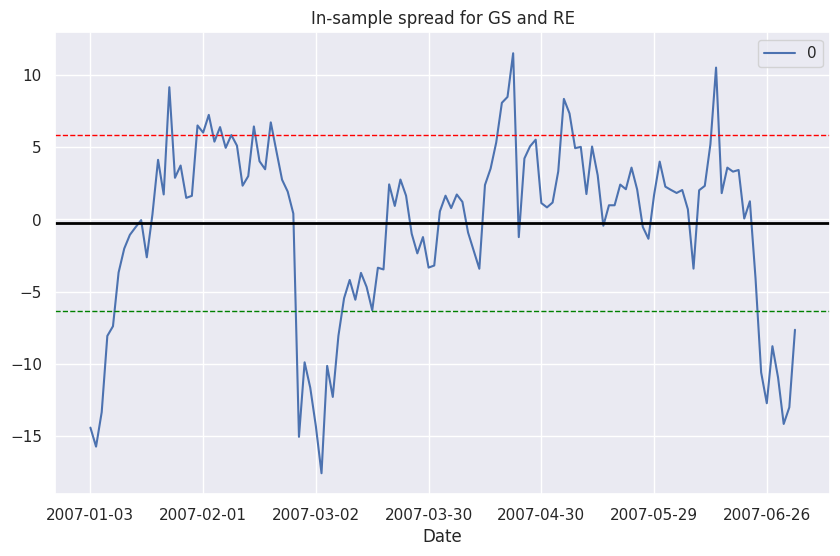

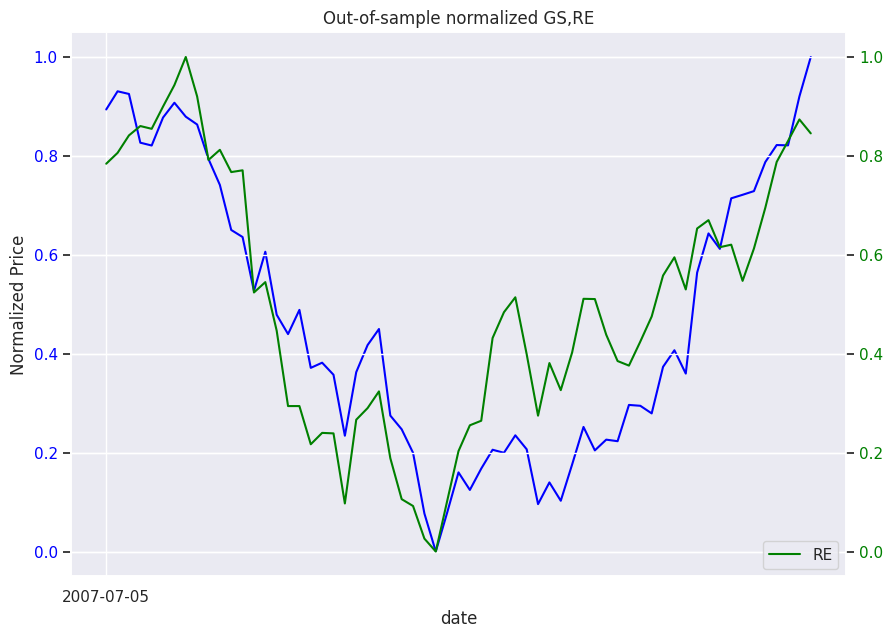

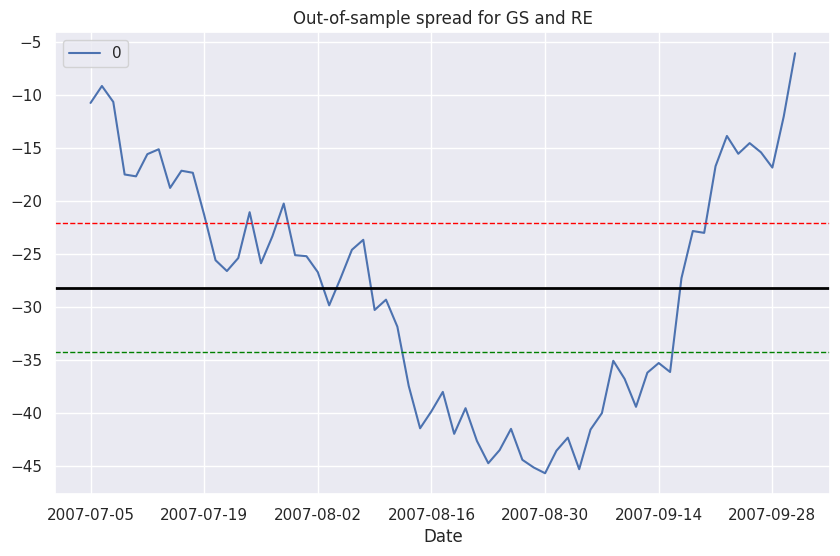

In [3]:


pair = coint_list[0]
plot_pair_data(in_sample_df, pair, 'In-sample')

plot_pair_data(out_of_sample_df, pair, 'Out-of-sample')


<h3>
Bollinger Band
</h3>
<p>
The pairs trading algorithm opens pairs positions when the spread is above or below the mean by some amount. In the academic theory of pairs
trading, the spread is a stationary time series, with a mean that is relatively constant between the in-sample and out-of-sample time periods
In practice the mean is often not constant and changes as the stock price time series change.
</p>
<p>
The mean is constantly changing, so a rolling mean is calculated on a look-back window. A rolling standard deviation is also
calculated on the same lookback window. When the spread is above or below the rolling mean times a multiplier, a pairs position is
opened. When there is an open pair position and the spread crosses the rolling mean, the position is closed.
</p>
<p>
This is a Bollinger Band and several articles have mentioned the application of Bollinger Bands for pairs trading.  See
<a href="http://jonathankinlay.com/2019/02/pairs-trading-in-practice/"><i>Pairs Trading in Practice</i> by Jonathan
Kinlay, Feb 18, 2019.
</p>


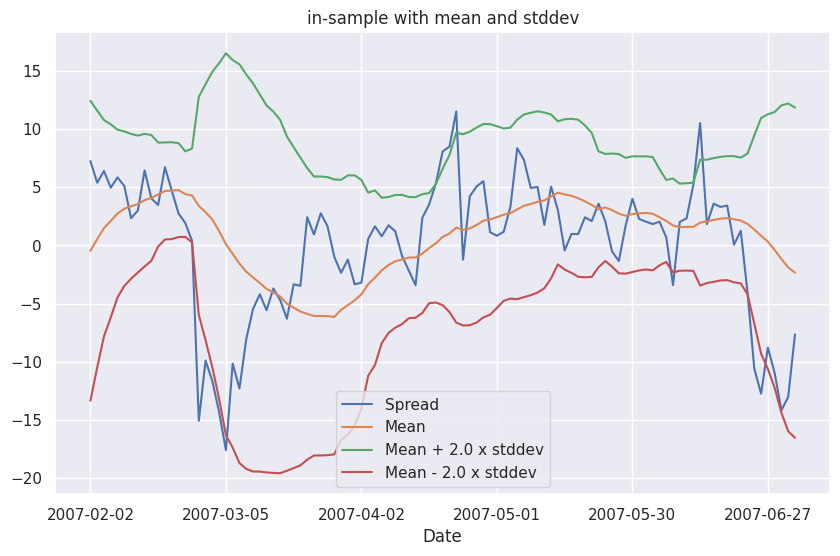

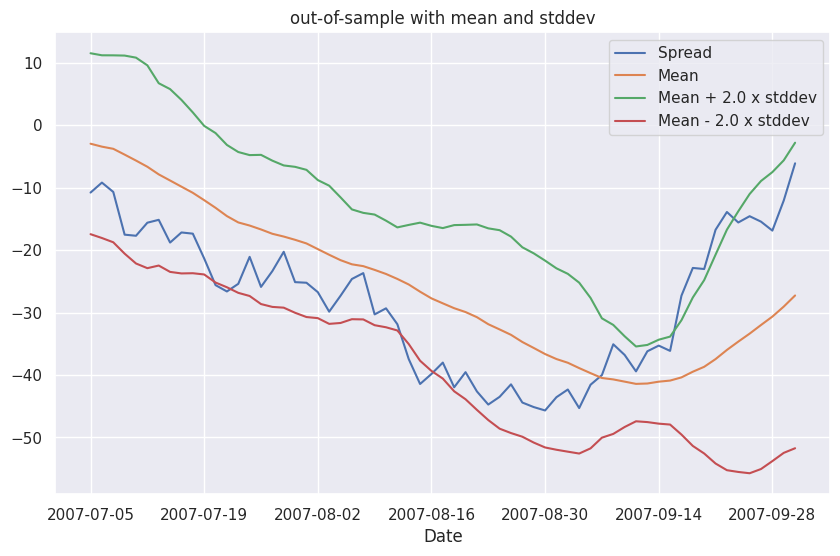

In [4]:

def plot_mean_spread(pair: CointData, close_prices_df: pd.DataFrame, start_ix: int, data_window: int,
                     mean_window: int, stddev_delta: float, title: str) -> None:
    """
    Starting at start_ix calculate the spread from start_ix to start_ix + data_window.
    Calculate the rolling mean from start_ix

    :param close_prices_df:
    :param start_ix:
    :param data_window:
    :param mean_window:
    :return:
    """
    end_ix = start_ix + mean_window + data_window
    index = close_prices_df.index[start_ix:end_ix]
    index_from_window = index[window:]
    stock_a_df = close_prices_df[pair.stock_a].iloc[start_ix:end_ix]
    stock_b_df = close_prices_df[pair.stock_b].iloc[start_ix:end_ix]
    spread_df = pd.DataFrame(stock_a_df.values - pair.intercept - pair.weight * stock_b_df.values)
    spread_df.columns = ['Spread']
    spread_mean_df = spread_df.rolling(mean_window).mean().iloc[mean_window:]
    spread_mean_df.columns = ['Mean']
    spread_mean_df.index = index_from_window
    spread_stddev_df = stddev_delta * spread_df.rolling(mean_window).std().iloc[mean_window:]
    mean_plus_stddev = pd.DataFrame(spread_mean_df.values + spread_stddev_df.values)
    mean_plus_stddev.index = index_from_window
    mean_plus_stddev.columns = [f'Mean + {stddev_delta} x stddev']
    mean_minus_stddev = pd.DataFrame(spread_mean_df.values - spread_stddev_df.values)
    mean_minus_stddev.index = index_from_window
    mean_minus_stddev.columns = [f'Mean - {stddev_delta} x stddev']
    spread_df: pd.DataFrame = spread_df.iloc[window:]
    spread_df.index = index_from_window
    spread_df.columns = ['Spread']
    data_df = pd.concat([spread_df, spread_mean_df, mean_plus_stddev, mean_minus_stddev], axis=1)
    data_df.plot(grid=True, title=title, figsize=(10,6))



window = trading_days // 12
window_in_of_sample_start = in_sample_start
plot_mean_spread(pair=pair, close_prices_df=close_prices_df, start_ix=window_in_of_sample_start,
                 data_window=half_year-window, mean_window=window, stddev_delta=2.0, title='in-sample with mean and stddev')

window_out_of_sample_start = in_sample_end - window
plot_mean_spread(pair=pair, close_prices_df=close_prices_df, start_ix=window_out_of_sample_start,
                 data_window=quarter, mean_window=window, stddev_delta=2.0, title='out-of-sample with mean and stddev')



In [5]:


holdings = 100000
margin = round(holdings / 3.0, 0)
trade_capital = holdings - margin
num_stocks = 100
stock_budget = int(trade_capital // num_stocks)


class OpenPosition(Enum):
    NOT_OPEN = 1
    SHORT_A_LONG_B = 2
    LONG_A_SHORT_B = 3
    SHARE_PRICE_OUT_OF_BUDGET = 4


class PairTransaction:
    """
    A container for the information on a pair transaction.
    """
    def __init__(self, open_date: datetime, close_date: datetime, pair_return: float, initial_margin: int, delta_margin: int):
        """
        :param open_date: the date the transaction was opened
        :param close_date: the date the transaction was closed
        :param pair_return: the return of the long-short position
        :param initial_margin: the margin cash required when the position was opened
        :param delta_margin: the maximum cash margin over the trading period
        """
        self.open_date = open_date
        self.close_date = close_date
        self.pair_return = pair_return
        self.initial_margin = initial_margin
        self.delta_margin = delta_margin


class OutOfSampleBacktest:
    initial_margin_percent = 0.50
    reg_T_margin_percent = 0.25

    class Position:
        def __init__(self, open_date: datetime, price_a: float, price_b: float, weight: float, budget: int,
                     position_type: OpenPosition):
            """
            spread = stock_A - Weight * Stock_B
            :param price_a: the current price of stock A
            :param price_b: the current price of stock B
            :param weight: the weighting factor for stock_B
            :param budget: the cash that can be allocated for the long/short position
            :param position_type: an enumeration value indicating the position type
            """
            self.position_type = position_type
            self.open_date = open_date
            self.price_a = price_a  # share price for stock A at time of position open
            self.price_b = price_b  # share price for stock B at time of position open
            self.weight_i = round(weight, 0)
            self.shares_a = 0
            self.shares_b = 0
            self.cost_a = 0
            self.cost_b = 0
            self.init_margin: int = 0  # The amount of cash needed beyond the pair long position on position open
            self.delta_margin: int = 0  # The maximum amount of cash needed at any time beyond the pair long position
            weighted_price_b = self.weight_i * self.price_b
            if position_type == OpenPosition.SHORT_A_LONG_B:
                # Short A
                self.shares_a = budget // self.price_a
                self.cost_a = round(self.shares_a * self.price_a, 0)

                cash = self.cost_a + (budget - self.cost_a)
                # Long weight * B
                weighted_shares_b = cash // weighted_price_b
                self.cost_b = round(weighted_shares_b * weighted_price_b, 0)
                self.shares_b = self.cost_b // self.price_b
                # The required margin is the short position + (short position x initial margin percent)
                # The long position can be used for part of the margin requirement
                required_margin = round(self.cost_a + self.cost_a * OutOfSampleBacktest.initial_margin_percent, 0)
                self.init_margin = max(required_margin - self.cost_b, 0)
            elif position_type == OpenPosition.LONG_A_SHORT_B:
                # Short weight * B
                weighted_shares_b = budget // weighted_price_b
                self.cost_b = round(weighted_shares_b * weighted_price_b, 0)
                self.shares_b = self.cost_b // self.price_b
                cash = self.cost_b + (budget - self.cost_b)
                # Long A
                self.shares_a = cash // self.price_a
                self.cost_a = round(self.shares_a * self.price_a, 0)
                required_margin = round(self.cost_b + self.cost_b * OutOfSampleBacktest.initial_margin_percent, 0)
                self.init_margin = max(required_margin - self.cost_a, 0)
            self.delta_margin = self.init_margin

    def __init__(self, out_of_sample_close_df: pd.DataFrame, pair_budget: int):
        self.out_of_sample_close_df = out_of_sample_close_df
        self.pair_budget = pair_budget

    def update_margin(self, position: Position, price_a: float, price_b: float) -> None:
        """
        Interactive Brokers adjusts the margin as the price changes. This means that as the price
        changes, additional margin may be required. This function calculates the maximum margin amount
        for the position.
        :param position: The Postion object
        :param price_a: The current price for stock A
        :param price_b: The current price for stock B
        :return: None
        """
        # Short A, Long B
        long_shares = position.shares_b
        short_shares = position.shares_a
        short_price = price_a
        long_price = price_b
        if position.position_type == OpenPosition.LONG_A_SHORT_B:
            # Short B, Long A
            short_price = price_b
            long_price = price_a
            long_shares = position.shares_a
            short_shares = position.shares_b
        short_position = short_shares * short_price
        long_position = long_shares * long_price
        required_margin = short_position + short_position * self.reg_T_margin_percent
        required_cash = max(required_margin - long_position, 0)
        position.delta_margin = max(position.delta_margin, required_cash)

    def close_position(self, position: Position, close_date: datetime, price_a: float, price_b: float) -> PairTransaction:
        """
        A short position has a positive return when the position close price is less than the open price.
        A long position has a positive return when the position close is greater than the open price.
        :param position: A Position object
        :param close_date: The date the position is closed
        :param price_a: The current price for stock A
        :param price_b: The current price for stock B
        :return: a PairTransaction object
        Summing returns: https://financetrain.com/how-to-annualize-monthly-returns-example
        """
        transaction = None
        if position.position_type == OpenPosition.LONG_A_SHORT_B or \
           position.position_type == OpenPosition.SHORT_A_LONG_B:
            # Short A, Long B
            long_shares = position.shares_b
            short_shares = position.shares_a
            long_position = position.cost_b
            short_position = position.cost_a
            close_long = long_shares * price_b
            close_short = short_shares * price_a
            if position.position_type == OpenPosition.LONG_A_SHORT_B:
                long_shares = position.shares_a
                short_shares = position.shares_b
                long_position = position.cost_a
                short_position = position.cost_b
                close_long = long_shares * price_a
                close_short = short_shares * price_b
            # Short return:
            #   short opens at 20
            #   short closes at 15
            #   R = (20 / 15) - 1 = 0.33
            # Long return
            #   long opens at 15
            #   long closes at 20
            #   R = (20/15) - 1 = 0.33
            ret_short = (short_position / close_short) - 1
            ret_long = (close_long / long_position) - 1
            # total return
            #   ret_short = 0.02
            #   ret_long = 0.03
            #   total = ((1 + 0.02) * (1 + 0.03)) - 1 = 0.0506
            total_return = round(((1 + ret_short) * (1 + ret_long)) - 1, 4)
            transaction = PairTransaction(open_date=position.open_date, close_date=close_date, pair_return=total_return,
                                          initial_margin=int(position.init_margin), delta_margin=int(position.delta_margin))
        return transaction

    def backtest_pair(self, pair_info: CointData, delta: float) -> List[PairTransaction]:
        position_type: OpenPosition = OpenPosition.NOT_OPEN
        position = None
        weight = pair_info.weight
        intercept = pair_info.intercept
        mean = pair_info.mean
        stock_a = pair_info.stock_a
        stock_b = pair_info.stock_b
        pair_close = self.out_of_sample_close_df[[stock_a, stock_b]]
        pair_transaction_l = list()
        for ix, day_close in pair_close.iterrows():
            transaction = None
            price_a = day_close[stock_a]
            price_b = day_close[stock_b]
            current_date = pd.to_datetime(ix)
            day_spread = price_a - intercept - (weight * price_b)
            if position_type == OpenPosition.NOT_OPEN:
                if day_spread >= mean + delta:
                    position_type = OpenPosition.SHORT_A_LONG_B
                elif day_spread <= mean - delta:
                    position_type = OpenPosition.LONG_A_SHORT_B
                position = self.Position(open_date=current_date, price_a=price_a, price_b=price_b, weight=weight, budget=self.pair_budget,
                                         position_type=position_type)
                if position.shares_a == 0 or position.shares_b == 0:
                    position_type = OpenPosition.SHARE_PRICE_OUT_OF_BUDGET
                    position.position_type = OpenPosition.SHARE_PRICE_OUT_OF_BUDGET
            elif position_type == OpenPosition.SHORT_A_LONG_B and day_spread or OpenPosition.LONG_A_SHORT_B:
                self.update_margin(position, price_a, price_b)
                if OpenPosition.SHORT_A_LONG_B and day_spread <= mean:
                    transaction = self.close_position(position, current_date, price_a, price_b)
                elif OpenPosition.LONG_A_SHORT_B and day_spread >= mean:
                    transaction = self.close_position(position, current_date, price_a, price_b)
            if transaction is not None:
                pair_transaction_l.append(transaction)
                position_type = OpenPosition.NOT_OPEN
        return pair_transaction_l


out_of_sample_test = OutOfSampleBacktest(out_of_sample_close_df=out_of_sample_df, pair_budget=stock_budget)
pair_transactions = out_of_sample_test.backtest_pair(pair_info=pair, delta=pair.stddev)


<h2>
Disclaimer
</h2>
<p>
This notebook is not financial advice, investment advice, or tax advice.
The information in this notebook is for informational and recreational purposes only.
Investment products discussed (ETFs, mutual funds, etc.) are for illustrative purposes
only. This is not a recommendation to buy, sell, or otherwise transact in any of the
products mentioned. Do your own due diligence. Past performance does not guarantee
future returns.
</p>